In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-data-analysis/Students data.csv


# 1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# 2. Exploratory Data Analysis  
Exploratory data analysis is a data analysis method used to examine and explore data sets. It is used to identify relationships and trends within data sets.

In [3]:
def check_df(dataframe, head=5):
    print("Shape:",dataframe.shape)
    print("\n")
    print("Data Types\n",dataframe.dtypes)
    print("\n")
    print("Head\n",dataframe.head(head))
    print("\n")
    print("Tail\n",dataframe.tail(head))
    print("\n")
    print("Null Check\n",dataframe.isnull().sum())
    print("\n")
    print("Duplicate Check:",dataframe.duplicated().sum())
    print("\nDistribution Information of Numerical Variables\n",dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [4]:
df = pd.read_csv("/kaggle/input/students-data-analysis/Students data.csv")

In [5]:
check_df(df)

Shape: (105, 17)


Data Types
 ID                       int64
class                   object
gender                  object
race                     int64
GPA                    float64
Algebra                  int64
Calculus1                int64
Calculus2                int64
Statistics               int64
Probability              int64
Measure                  int64
Functional_analysis      int64
from1                   object
from2                   object
from3                   object
from4                    int64
y                        int64
dtype: object


Head
      ID class  gender  race    GPA  Algebra  Calculus1  Calculus2  Statistics  \
0  1141     A    male     1  73.47       64         81         87          60   
1  1142     A  female     1  71.22       57         50         51          51   
2  1143     A  female     2  74.56       47         48         71          60   
3  1144     A  female     1  72.89       46         72         38          60   
4  1145     A  

The final indicator y:

* 0, one fails to apply for the graduate school, who may apply again or search jobs in the future  
* 1, success, inland  
* 2, success, abroad  

In [6]:
df['y'].value_counts(normalize=True) * 100

y
0    52.380952
1    23.809524
2    23.809524
Name: proportion, dtype: float64

# 3. Capture Categorical Variables

In [7]:
def grab_col_names(dataframe, cat_th=10, car_th=20,ignore_cols=None):
    """
   cat_th: numeric column threshold that behaves like a categorical column
   car_th: categorical column threshold with too many classes (cardinal)
    """
    if ignore_cols:
        dataframe = dataframe.drop(columns=ignore_cols)

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtype != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtype == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtype != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'Categorical Columns: {len(cat_cols)}')
    print(f'Numerical Columns: {len(num_cols)}')
    print(f'Categorical but Cardinal: {len(cat_but_car)}')
    
    return cat_cols, num_cols, cat_but_car

In [8]:
cat_cols, num_cols, cat_but_car = grab_col_names(df, ignore_cols=["ID"])

Observations: 105
Variables: 16
Categorical Columns: 7
Numerical Columns: 8
Categorical but Cardinal: 1


# 4. Categorical Variable Analysis

************************************************************
class Variable:
class
A    76
B    29
Name: count, dtype: int64
************************************************************


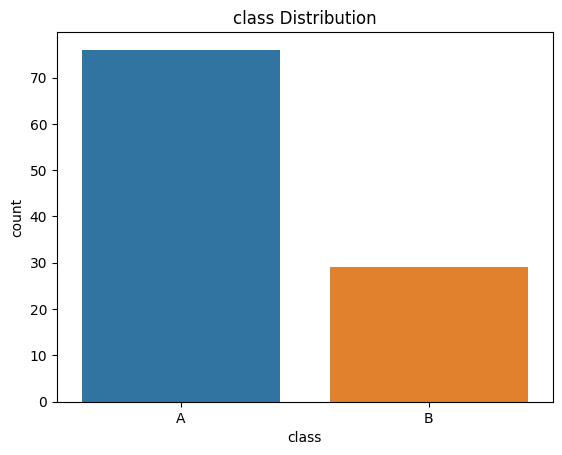





************************************************************
gender Variable:
gender
female    68
male      37
Name: count, dtype: int64
************************************************************


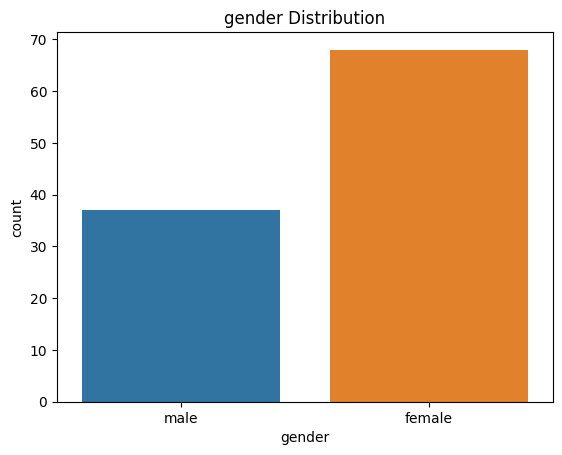





************************************************************
from2 Variable:
from2
B    73
A    32
Name: count, dtype: int64
************************************************************


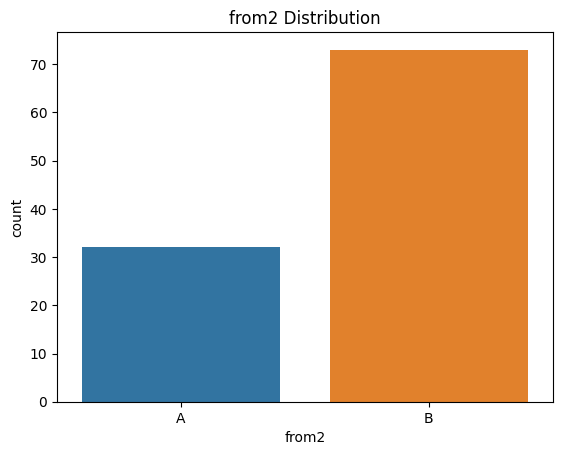





************************************************************
from3 Variable:
from3
A    81
D    10
S     6
C     4
B     4
Name: count, dtype: int64
************************************************************


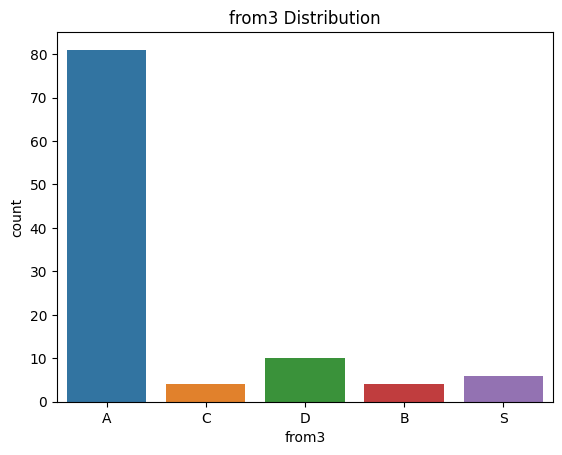





************************************************************
race Variable:
race
1    81
3     6
7     5
4     4
5     4
2     3
6     2
Name: count, dtype: int64
************************************************************


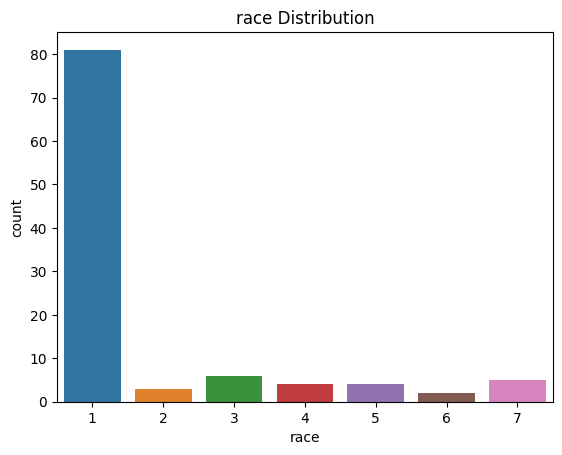





************************************************************
from4 Variable:
from4
0    79
2    25
3     1
Name: count, dtype: int64
************************************************************


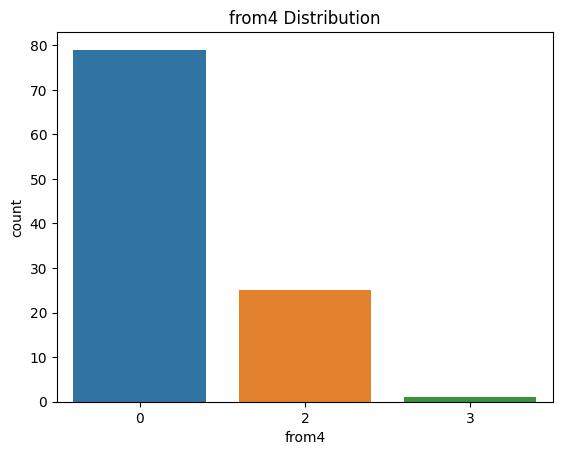





************************************************************
y Variable:
y
0    55
1    25
2    25
Name: count, dtype: int64
************************************************************


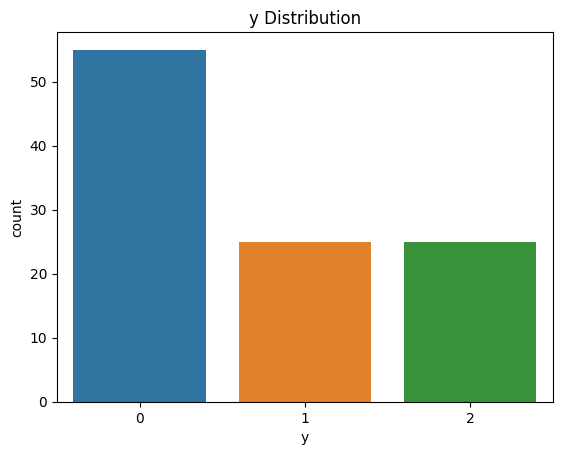

In [9]:
for col in cat_cols:
    print("*" * 60)
    print(f"{col} Variable:")
    print(df[col].value_counts())
    print("*" * 60)
    sns.countplot(x=col, data=df)
    plt.title(f"{col} Distribution")
    plt.show()
    print("\n\n\n")

#  5. Numerical Variable Analysis

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


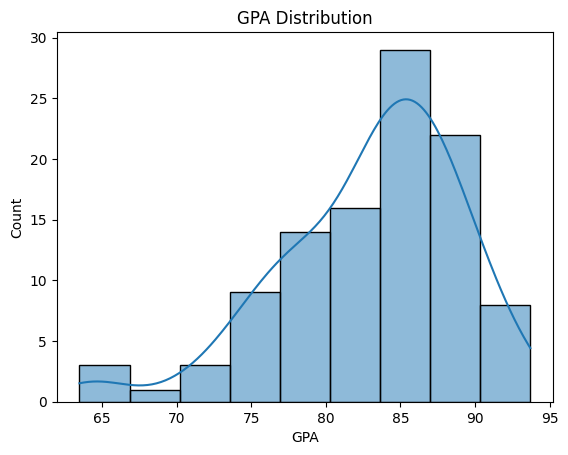

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


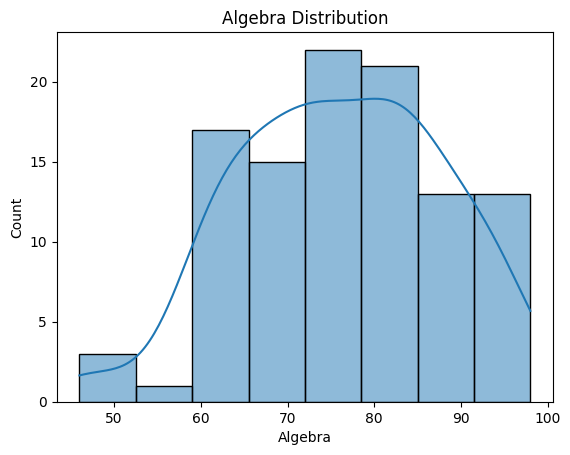

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


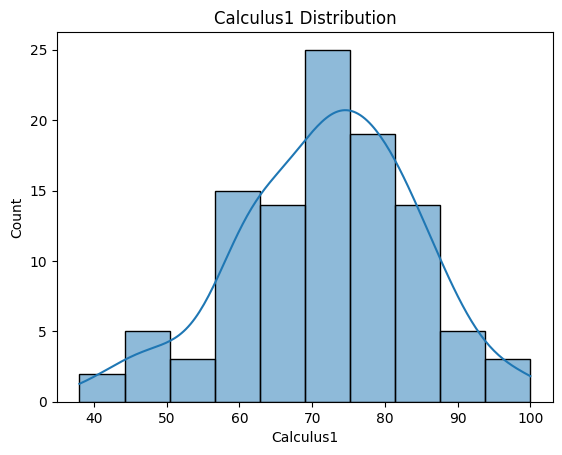

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


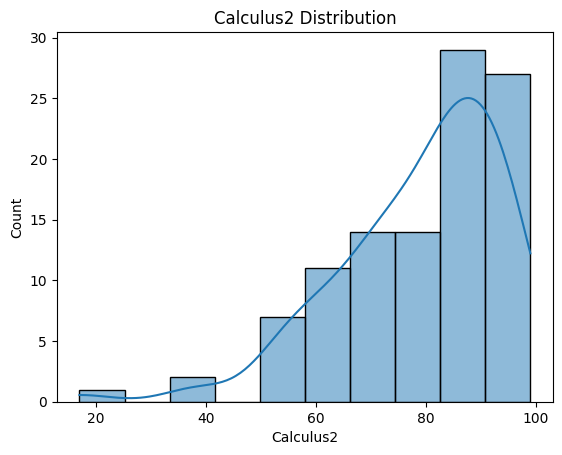

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


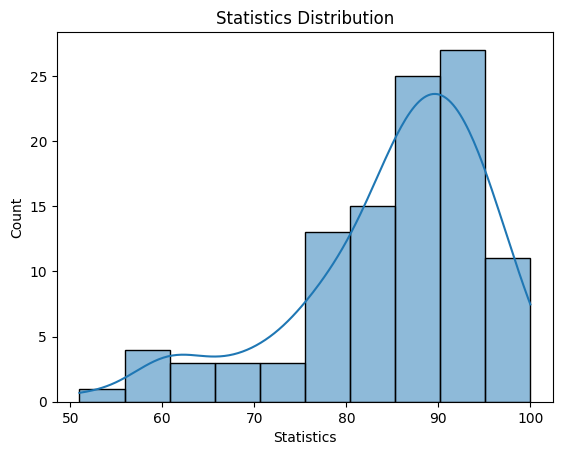

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


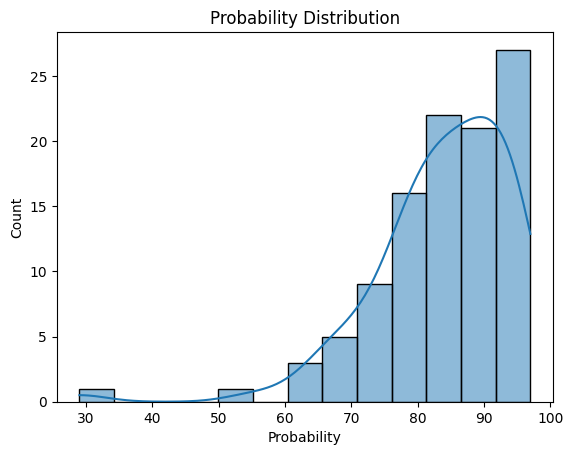

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


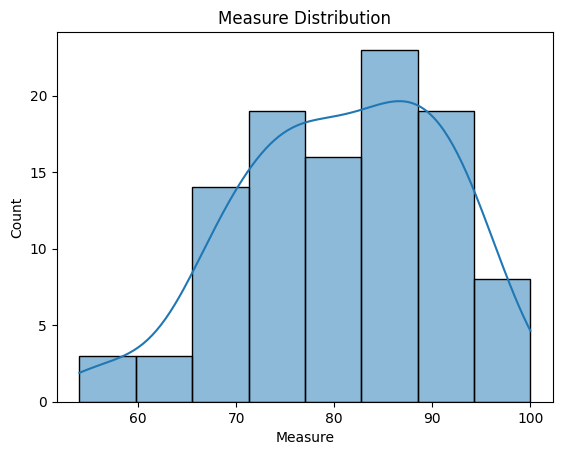

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


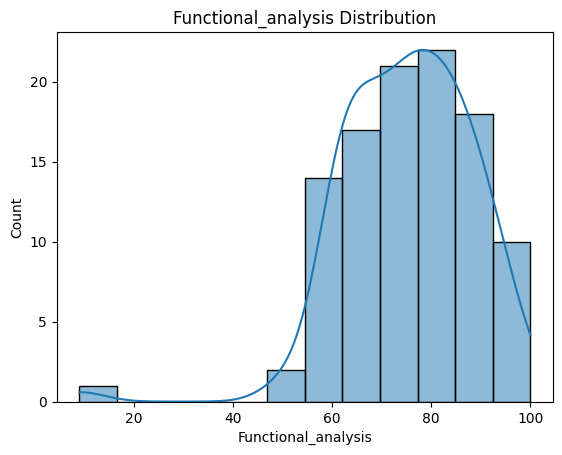

In [10]:
for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution")
    plt.show()

# 6. Feature Engineering

In [11]:
# math class columns
math_cols = ['Algebra', 'Calculus1', 'Calculus2', 'Statistics', 'Probability', 'Measure', 'Functional_analysis']

# avarage column
df['math_avg'] = df[math_cols].mean(axis=1)

In [12]:
# is there any lesson graded under 40?
df['has_low_math'] = (df[math_cols] < 40).any(axis=1).astype(int)

In [13]:
print(df[['math_avg', 'has_low_math']].head())

    math_avg  has_low_math
0  71.000000             0
1  55.285714             0
2  59.857143             0
3  50.000000             1
4  58.571429             0


# 7. Categorical Encoding

In [14]:
# one-hot encoding for columns with few categories
few_cat = ['gender', 'class']
df = pd.get_dummies(df, columns=few_cat, drop_first=True)

# label encoding for columns with multi categories
label_enc_cols = ['race', 'from1', 'from2', 'from3']
for col in label_enc_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


# 8. Modeling

In [15]:
# X and y distinction
X = df.drop("y", axis=1)
y = df["y"]


# splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# scaling (for logistic regression and SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=2000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

for name, model in models.items():
    print(f"--- {name} ---")
    
    # decide whether to use scaled
    if name in ["Logistic Regression", "SVM"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")
    print("*" * 60)

--- Logistic Regression ---

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.73      0.64        11
           1       0.50      0.20      0.29         5
           2       0.40      0.40      0.40         5

    accuracy                           0.52        21
   macro avg       0.49      0.44      0.44        21
weighted avg       0.51      0.52      0.50        21

Confusion Matrix:
 [[8 0 3]
 [4 1 0]
 [2 1 2]]


************************************************************
--- Random Forest ---

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.82      0.64        11
           1       0.50      0.20      0.29         5
           2       0.50      0.20      0.29         5

    accuracy                           0.52        21
   macro avg       0.51      0.41      0.40        21
weighted avg       0.52      0.52      0.47        21

Confusion Matrix:
 [[9 1 1]


Accuracy values ​​are around 48%–52%, which is low. After the train-test split, only 21 examples were included in the test set, which is very small. This leaves a large margin of error for the model in delivering overall results.

The class distribution may be unbalanced. In particular, if the target variable y (0, 1, 2) has a small number of classes, the model cannot learn those classes. If 0 >> 1 > 2, the model may always predict 0. To check that:

In [17]:
print(y.value_counts())

y
0    55
1    25
2    25
Name: count, dtype: int64


Class Distribution: 0 -> 52%, 1 -> 24%, 2 -> 24%  
This means that Class 0 is weighted, meaning the model is biased towards predicting 0 by default. This explains why recall and precision are particularly poor for classes 1 and 2.

To solve the problem, I used "class_weight='balanced'" This setting makes the model give more importance to minority classes.

In [18]:
# models after adding (class_weight='balanced')
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42, max_iter=2000),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "SVM": SVC(class_weight='balanced', random_state=42)}

In [19]:
# training and evaluation 
for name, model in models.items():
    print(f"--- {name} ---")
    
    if name in ["Logistic Regression", "SVM"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")
    print("*" * 60)


--- Logistic Regression ---
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.64      0.64        11
           1       0.67      0.40      0.50         5
           2       0.43      0.60      0.50         5

    accuracy                           0.57        21
   macro avg       0.58      0.55      0.55        21
weighted avg       0.59      0.57      0.57        21

Confusion Matrix:
 [[7 0 4]
 [3 2 0]
 [1 1 3]]


************************************************************
--- Random Forest ---
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.82      0.67        11
           1       0.50      0.20      0.29         5
           2       0.67      0.40      0.50         5

    accuracy                           0.57        21
   macro avg       0.58      0.47      0.48        21
weighted avg       0.57      0.57      0.54        21

Confusion Matrix:
 [[9 1 1]
 [

This project aimed to predict graduate school application outcomes (success/failure) based on students' past academic performance and socio-demographic information. Following EDA and feature engineering, Logistic Regression, Random Forest, and SVM models were compared.

Logistic Regression provided the most balanced recall values for class 1 and class 2. It also demonstrated generally satisfactory performance in terms of precision and f1-score. It was a balancing model because it predicted a little from each class.

Random Forest learned class 0 (application failure) very well (Recall ≈ 0.82). However, due to the unbalanced class distribution, this biased the model toward the majority class, weakening its performance on class 1 and class 2.

SVM performed slightly better on class 1 and class 2. However, its overall accuracy was lower than the other models. It also exhibited unbalanced performance on class 0.

In conclusion, while each model has its own advantages, the class imbalance and small data size in the dataset limited the models' overall success. Therefore, retraining the models with a larger, more balanced dataset could yield more robust results.